In [1]:
!jar xvf test.zip

  created: test/artifact/
 inflated: test/artifact/1-103999-A-30.wav
 inflated: test/artifact/1-15689-A-4.wav
 inflated: test/artifact/1-181071-A-40.wav
 inflated: test/artifact/1-18527-A-44.wav
 inflated: test/artifact/1-19501-A-7.wav
 inflated: test/artifact/1-196660-A-8.wav
 inflated: test/artifact/1-19840-A-36.wav
 inflated: test/artifact/1-20736-A-18.wav
 inflated: test/artifact/1-22694-A-20.wav
 inflated: test/artifact/1-23706-A-49.wav
 inflated: test/artifact/1-30214-A-18.wav
 inflated: test/artifact/1-34094-B-5.wav
 inflated: test/artifact/1-35687-A-38.wav
 inflated: test/artifact/1-40967-A-28.wav
 inflated: test/artifact/1-43760-A-11.wav
 inflated: test/artifact/1-44831-A-1.wav
 inflated: test/artifact/1-45641-A-27.wav
 inflated: test/artifact/1-47273-A-21.wav
 inflated: test/artifact/1-51436-A-17.wav
 inflated: test/artifact/1-51805-A-33.wav
 inflated: test/artifact/1-54065-B-45.wav
 inflated: test/artifact/1-54747-A-46.wav
 inflated: test/artifact/1-54918-A-14.wav
 inflated:

In [2]:
!unzip test.aAzip

Archive:  test.zip
replace test/artifact/1-103999-A-30.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/artifact/1-103999-A-30.wav  
  inflating: test/artifact/1-15689-A-4.wav  
  inflating: test/artifact/1-181071-A-40.wav  
  inflating: test/artifact/1-18527-A-44.wav  
  inflating: test/artifact/1-19501-A-7.wav  
  inflating: test/artifact/1-196660-A-8.wav  
  inflating: test/artifact/1-19840-A-36.wav  
  inflating: test/artifact/1-20736-A-18.wav  
  inflating: test/artifact/1-22694-A-20.wav  
  inflating: test/artifact/1-23706-A-49.wav  
  inflating: test/artifact/1-30214-A-18.wav  
  inflating: test/artifact/1-34094-B-5.wav  
  inflating: test/artifact/1-35687-A-38.wav  
  inflating: test/artifact/1-40967-A-28.wav  
  inflating: test/artifact/1-43760-A-11.wav  
  inflating: test/artifact/1-44831-A-1.wav  
  inflating: test/artifact/1-45641-A-27.wav  
  inflating: test/artifact/1-47273-A-21.wav  
  inflating: test/artifact/1-51436-A-17.wav  
  inflating: test/artifact/1

In [3]:
!pip install transformers[torch] torchmetrics datasets evaluate torch_audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00

# Data preprocessing

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

import torch
import torchmetrics
from torch.utils.data import DataLoader
from torch import nn

from datasets import load_dataset, load_from_disk, Audio, Dataset
from transformers import ASTForAudioClassification, ASTFeatureExtractor
from transformers import AutoModelForAudioClassification, Trainer, TrainingArguments

import evaluate

import wandb

device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
dataset_test = load_dataset("audiofolder", "test")

Resolving data files:   0%|          | 0/656 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [7]:
labels = ['artifact', 'healthy', 'unhealthy']

label2id = {label: labels.index(label) for label in labels}
id2label = {str(id): label for label, id in label2id.items()}

In [8]:
model_checkpoint = "Vladimirlv/ast-finetuned-audioset-10-10-0.4593-heart-sounds"

In [9]:
TIME_LIMIT_SECONDS = 30
SAMPLE_RATE = 16000
target_length = SAMPLE_RATE * TIME_LIMIT_SECONDS
extractor = ASTFeatureExtractor.from_pretrained(
    model_checkpoint,
    do_normalize=True
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [10]:
def preprocess(dataset, extractor=extractor, batch_size=10, num_proc=1, target_length=target_length):
    # Ensure the audio is loaded with the correct sampling rate
    dataset = dataset.cast_column("audio", Audio(sampling_rate=extractor.sampling_rate))

    def preprocess_function(examples):
        audio_arrays = []
        new_labels = []
        for audio, label in zip(examples["audio"], examples["label"]):
            arr = audio["array"]
            # Ensure each audio sample is exactly 30 seconds long
            if len(arr) < target_length:
                arr = np.pad(arr, (0, target_length - len(arr)), mode='constant')
            else:
                arr = arr[:target_length]
            audio_arrays.append(arr)
            new_labels.append(label)  # Assuming label is already numeric

        # Use the feature extractor without additional truncation or max_length adjustments.
        inputs = extractor(
            audio_arrays,
            sampling_rate=SAMPLE_RATE,
            truncation=False  # Not needed since we've fixed the length manually
            # Optionally add padding="longest" if required by your model architecture
        )
        # Explicitly convert labels to torch.long
        inputs["labels"] = torch.tensor(new_labels, dtype=torch.long)
        return inputs

    dataset = dataset.map(
        preprocess_function,
        batched=True,
        batch_size=batch_size,
        num_proc=num_proc,
        remove_columns=["audio"]
    )

    return dataset

In [11]:
dataset_test = preprocess(dataset_test)

Map:   0%|          | 0/656 [00:00<?, ? examples/s]

In [12]:
dataset_test = dataset_test["test"]

Available keys in the sample: dict_keys(['label', 'input_values', 'labels'])


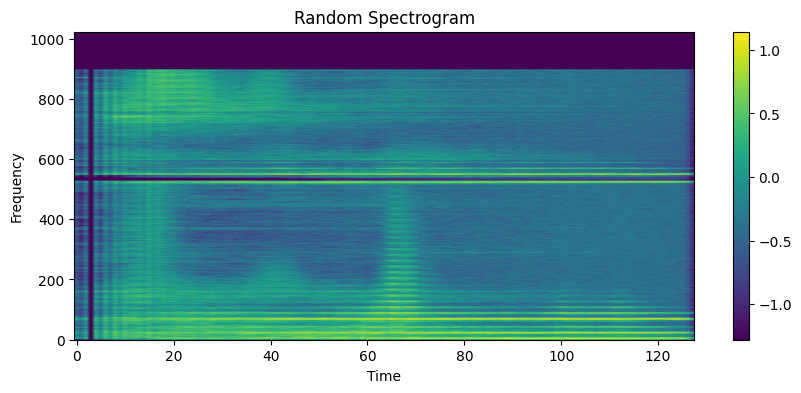

In [20]:
idx = random.randint(0, len(dataset_test) - 1)
sample = dataset_test[idx]

# Print the keys to inspect the available data
print("Available keys in the sample:", sample.keys())

# Assuming the spectrogram is stored under 'input_values'
spectrogram = np.array(sample["input_values"])

# If the spectrogram has an extra channel dimension (e.g., shape (1, H, W)), remove it:
if spectrogram.ndim == 3 and spectrogram.shape[0] == 1:
    spectrogram = np.squeeze(spectrogram, axis=0)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram, origin="lower", aspect="auto")
plt.title("Random Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

In [15]:
model = AutoModelForAudioClassification.from_pretrained("Vladimirlv/ast-finetuned-audioset-10-10-0.4593-heart-sounds")

config.json:   0%|          | 0.00/833 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/345M [00:00<?, ?B/s]

# Evaluate metrics

In [21]:
model.eval()

ASTForAudioClassification(
  (audio_spectrogram_transformer): ASTModel(
    (embeddings): ASTEmbeddings(
      (patch_embeddings): ASTPatchEmbeddings(
        (projection): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ASTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ASTLayer(
          (attention): ASTSdpaAttention(
            (attention): ASTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ASTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ASTIntermediate(
       

## Accuracy, Precision, Recall, Confusion Matrix

In [22]:
def get_prediction(example):
    # Convert the list/array to a tensor and add a batch dimension.
    input_tensor = torch.tensor(example["input_values"]).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_tensor)
    # Get predicted class index by taking the argmax over the logits.
    pred = torch.argmax(outputs.logits, dim=-1).item()
    return pred


dataset_test = dataset_test.map(lambda x: {"pred": get_prediction(x)})

Map:   0%|          | 0/656 [00:00<?, ? examples/s]

Overall Metrics:
Accuracy: 0.9557926829268293
Precision per class: [1.         0.96716418 0.84615385]
Recall per class: [1.         0.94736842 0.9       ]


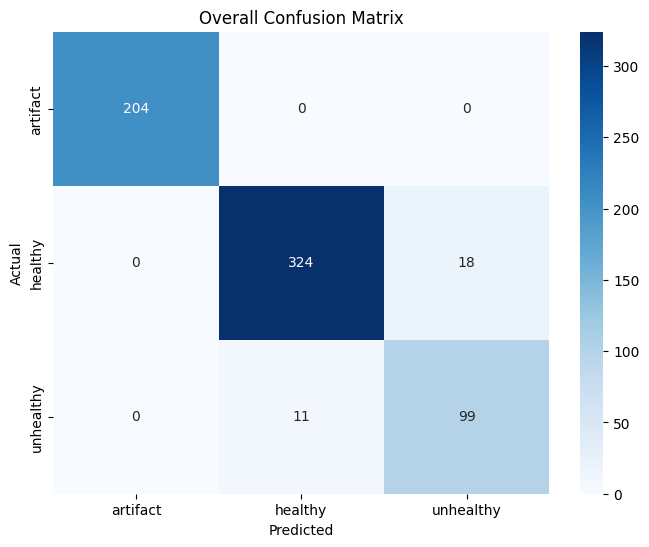

In [23]:
y_true = np.array(dataset_test["label"])
y_pred = np.array(dataset_test["pred"])

accuracy_overall = accuracy_score(y_true, y_pred)
conf_matrix_overall = confusion_matrix(y_true, y_pred)
precision_overall = precision_score(y_true, y_pred, average=None)
recall_overall = recall_score(y_true, y_pred, average=None)

print("Overall Metrics:")
print("Accuracy:", accuracy_overall)
print("Precision per class:", precision_overall)
print("Recall per class:", recall_overall)


# Plot overall confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_overall, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Overall Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Binary Metrics (Healthy vs. Unhealthy):
Accuracy: 0.9358407079646017
Precision: 0.8461538461538461
Recall: 0.9


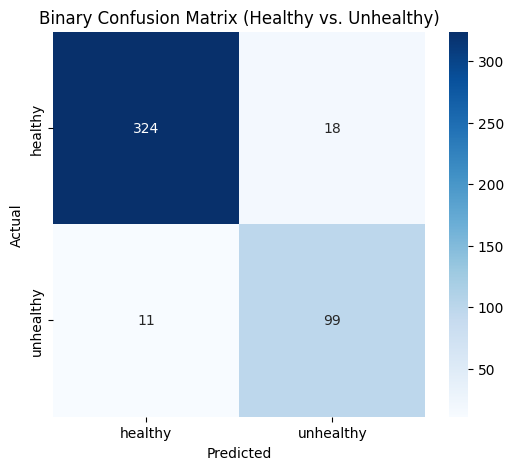

In [24]:
binary_mask = y_true != 0
y_true_binary = y_true[binary_mask]
y_pred_binary = y_pred[binary_mask]


y_true_binary_remap = y_true_binary - 1
y_pred_binary_remap = y_pred_binary - 1

accuracy_binary = accuracy_score(y_true_binary_remap, y_pred_binary_remap)
conf_matrix_binary = confusion_matrix(y_true_binary_remap, y_pred_binary_remap)
precision_binary = precision_score(y_true_binary_remap, y_pred_binary_remap)
recall_binary = recall_score(y_true_binary_remap, y_pred_binary_remap)

print("Binary Metrics (Healthy vs. Unhealthy):")
print("Accuracy:", accuracy_binary)
print("Precision:", precision_binary)
print("Recall:", recall_binary)

# Define class names for binary metrics
class_names_binary = ['healthy', 'unhealthy']

# Plot binary confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_binary, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names_binary, yticklabels=class_names_binary)
plt.title("Binary Confusion Matrix (Healthy vs. Unhealthy)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## pr auc and roc auc with probabilities (overconfident)

In [25]:
def get_probabilities(example):
    # Convert input_values to a tensor, add batch dimension, and compute softmax probabilities.
    input_tensor = torch.tensor(example["input_values"]).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_tensor)
    probs = torch.softmax(outputs.logits, dim=-1).squeeze(0).numpy()
    return probs

# Add a new field 'probs' to each example
dataset_test = dataset_test.map(lambda x: {"probs": get_probabilities(x)})

# Stack probabilities into a numpy array: shape (num_samples, num_classes)
y_probs = np.stack(dataset_test["probs"])

Map:   0%|          | 0/656 [00:00<?, ? examples/s]

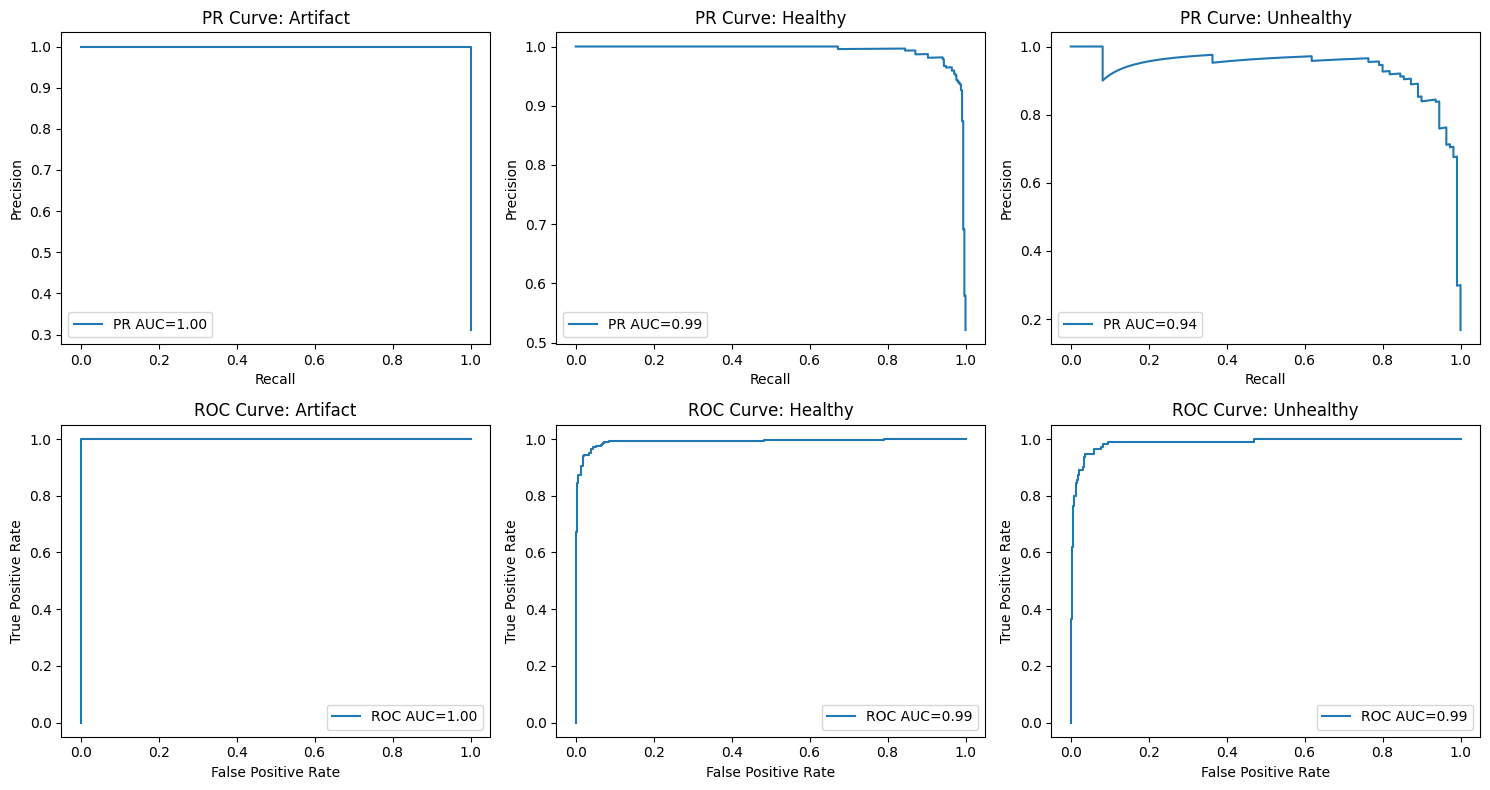

In [26]:
# Extract true labels (replace "label" with your dataset's actual key)
y_true = dataset_test["label"]
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])  # Keep numeric classes here
n_classes = y_probs.shape[1]

plt.figure(figsize=(15, 8))
for i in range(n_classes):
    # Get class name for the current index
    class_name = labels[i]

    # Compute Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_true_bin[:, i], y_probs[:, i])

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc_val = auc(fpr, tpr)

    # Plot Precision-Recall curve
    plt.subplot(2, n_classes, i + 1)
    plt.plot(recall_curve, precision_curve, label=f'PR AUC={auc(recall_curve, precision_curve):.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'PR Curve: {class_name.capitalize()}')
    plt.legend()

    # Plot ROC curve
    plt.subplot(2, n_classes, n_classes + i + 1)
    plt.plot(fpr, tpr, label=f'ROC AUC={roc_auc_val:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {class_name.capitalize()}')
    plt.legend()

plt.tight_layout()
plt.show()